# Julia Model


$$\Delta_g = m g \sin\theta(x) v$$
$$\Delta_r = mgRv$$
$$\Delta_w = A(x) (v - w \cos \phi)^2 v $$
$$\frac{dK}{dt} = P - \Delta_g - \Delta_r - \Delta_w$$

$$K= \frac{mv^2}{2}$$

---

Reference: https://www.tandfonline.com/doi/pdf/10.1080/02640414.2012.654397?casa_token=w6gTI3_3KiMAAAAA:_sbQwxVCZfqGkAQyI3VUVxkgIluaX9y9M_whyhjlu0jcghtkCOb0YH0qas88yWwcuG3UVnSKrNBFJ70

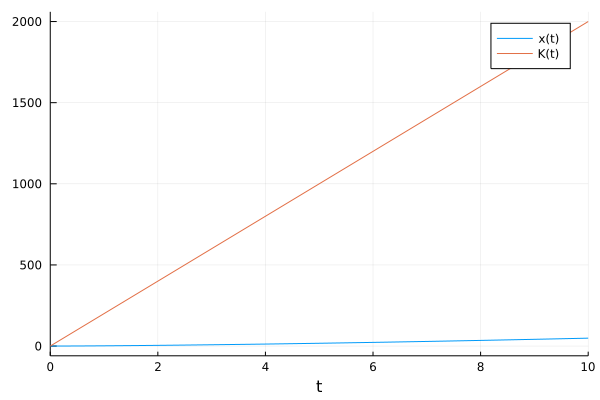

In [102]:
using ModelingToolkit, OrdinaryDiffEq

@parameters P_out
@variables t K(t) x(t)
D = Differential(t)

 eqs = [P ~ P_out,
        D(K) ~ P,
        D(x) ~ (2 * K / m)^(1/2)
]

sys = ODESystem(eqs)
prob = ODEProblem(structural_simplify(sys),
                 [K => 0.0, x => 0.0],
                 (0.0,10.0), 
                 [P_out => 200, m => 75])

using DifferentialEquations: solve
using Plots: plot

sol = solve(prob)
plot(sol, vars=[x, K])

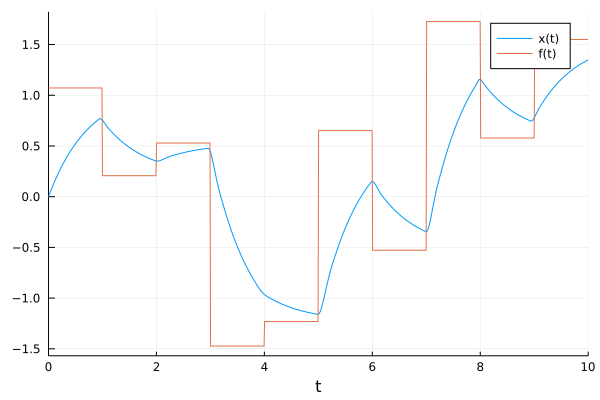

In [81]:
using ModelingToolkit

@variables t x(t) f(t)  # independent and dependent variables
@parameters τ       # parameters
D = Differential(t) # define an operator for the differentiation w.r.t. time

value_vector = randn(10)
f_fun(t) = t >= 10 ? value_vector[end] : value_vector[Int(floor(t))+1]
@register f_fun(t)

@named fol_external_f = ODESystem([f ~ f_fun(t),
                                   D(x) ~ (f - x)/τ])

prob = ODEProblem(structural_simplify(fol_external_f), [x => 0.0], (0.0,10.0), [τ => 0.75])

sol = solve(prob)
plot(sol, vars=[x,f])

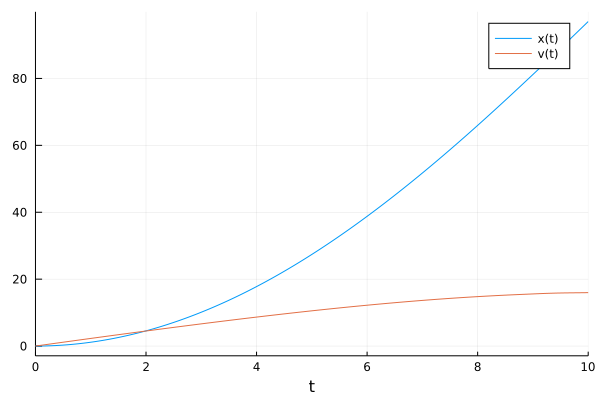

In [145]:
using ModelingToolkit, OrdinaryDiffEq

@parameters P_out A m g R
@variables t v(t) x(t)
D = Differential(t)

eqs = [P ~ P_out,
        P_w ~ A * v^3,
        P_r ~ m * g * R * v,
        D(x) ~ v,
        D(v) ~ ((2 / m) * (P - P_w - P_r))^(1/2),
]

sys = ODESystem(eqs)
prob = ODEProblem(structural_simplify(sys),
                 [v => 0.0, x => 0.0],
                 (0.0,10.0), 
                 [P_out => 200, m => 75, A => 0.032, g => 10, R => 0.0055])

using DifferentialEquations: solve
using Plots: plot

sol = solve(prob)
plot(sol, vars=[x, v])

In [142]:
using ModelingToolkit, OrdinaryDiffEq

@parameters P_out A m g R
@variables t v(t) x(t)
D = Differential(t)

model_sin(t) = 0.01
@register model_sin(t)

eqs = [P ~ P_out,
        P_g ~ m * g * v * model_sin(t),
        P_w ~ A * v^3,
        P_r ~ m * g * R * v,
        D(x) ~ v,
        D(v) ~ ((2 / m) * (P - P_w - P_r - P_g))^(1/2),
]

sys = ODESystem(eqs)
prob = ODEProblem(structural_simplify(sys),
                 [v => 0.0, x => 0.0],
                 (0.0,10.0), 
                 [P_out => 300, m => 75, A => 0.032, g => 10, R => 0.0055])

using DifferentialEquations: solve
using Plots: plot

sol = solve(prob)
plot(sol, vars=[x, v])

LoadError: DomainError with -4.262687762168881:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.